In [2]:
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller
import matplotlib.pyplot as plt


In [3]:
def generate_datapoint(params):
    mu=params[0]
    sigma =params[1]
    return np.random.normal(mu, sigma)

Series A

C:\Users\kaush\AppData\Local\Temp\ipykernel_25504\3879955899.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  A=pd.Series(index=range(T))


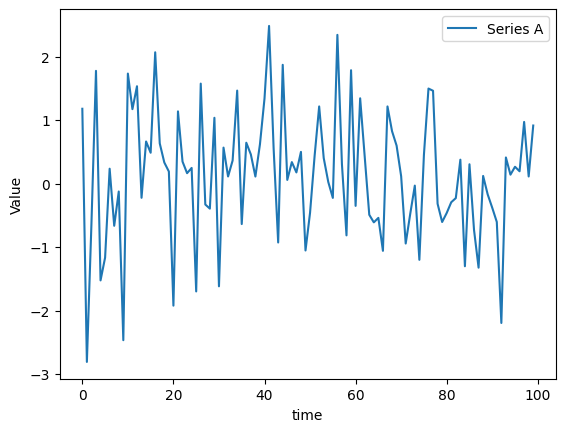

In [4]:
params=(0,1)
T=100
A=pd.Series(index=range(T))
A.name='A'
for t in range(T):
    A[t]=generate_datapoint(params)

plt.plot(A)
plt.xlabel('time')
plt.ylabel('Value')
plt.legend(['Series A']);

C:\Users\kaush\AppData\Local\Temp\ipykernel_25504\1307734418.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  B=pd.Series(index=range(T))


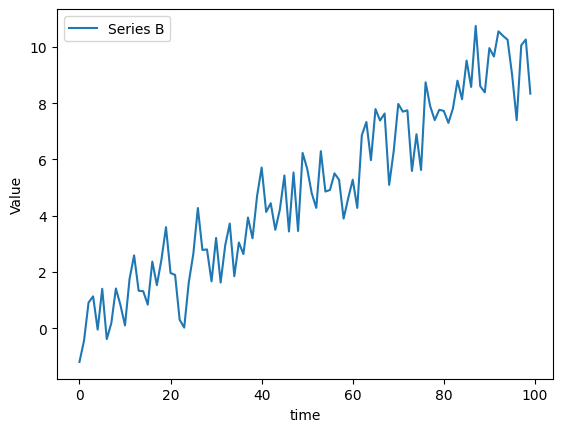

In [5]:
# Set the number of datapoints
T=100

B=pd.Series(index=range(T))
B.name='B'

for t in range(T):
    params=(t*0.1,1)
    B[t]=generate_datapoint(params)
plt.plot(B)
plt.xlabel('time')
plt.ylabel('Value')
plt.legend(['Series B']);

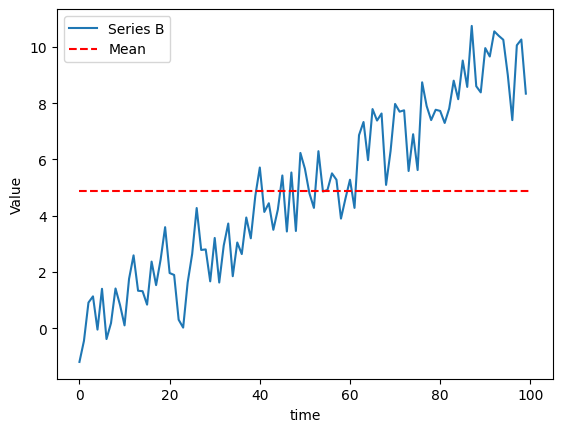

In [6]:
m=np.mean(B)
plt.plot(B)
plt.hlines(m,0,len(B), linestyles='dashed', colors='r')
plt.xlabel('time')
plt.ylabel('Value')
plt.legend(['Series B','Mean']);

Testing for Stationarity

In [7]:
def check_for_stationarity(X,cutoff=0.01):
    pvalue=adfuller(X)[1]
    if pvalue<cutoff:
        print ('p-value= '+str(pvalue)+' The series '+X.name+' is likely Stationary.')
        return True
    else:
        print('p-value='+ str(pvalue) + 'The series'+ X.name+' is likely non-stattionary')
        return False

In [8]:
check_for_stationarity(A)
check_for_stationarity(B)

p-value= 3.3158469771404795e-18 The series A is likely Stationary.
p-value=0.8553695503685682The seriesB is likely non-stattionary


False

C:\Users\kaush\AppData\Local\Temp\ipykernel_25504\3780232129.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  C=pd.Series(index=range(T))


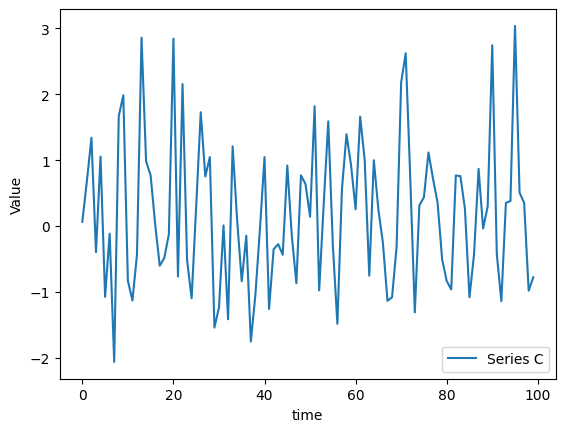

In [11]:
T=100
C=pd.Series(index=range(T))
C.name='C'
for t in range(T):
    params=(np.sin(t),1)
    C[t]=generate_datapoint(params)
plt.plot(C)

plt.xlabel('time')
plt.ylabel('Value')
plt.legend(['Series C']);



In [9]:
R=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
k=1
W=dict([x,x] for  x in R)
w=sum(W)/20

while k <100:
    k+=1
    V=dict([(x,max(x+W[x],w)) for x in R])
    W,w=V,sum(V.values())/20
    print(W)
#     print(f"k={k} w ~ {RR(w)} with support {[x for x in R if W[x]==k*x]}")



{1: 10.5, 2: 10.5, 3: 10.5, 4: 10.5, 5: 10.5, 6: 12, 7: 14, 8: 16, 9: 18, 10: 20, 11: 22, 12: 24, 13: 26, 14: 28, 15: 30, 16: 32, 17: 34, 18: 36, 19: 38, 20: 40}
{1: 22.125, 2: 22.125, 3: 22.125, 4: 22.125, 5: 22.125, 6: 22.125, 7: 22.125, 8: 24, 9: 27, 10: 30, 11: 33, 12: 36, 13: 39, 14: 42, 15: 45, 16: 48, 17: 51, 18: 54, 19: 57, 20: 60}
{1: 35.04375, 2: 35.04375, 3: 35.04375, 4: 35.04375, 5: 35.04375, 6: 35.04375, 7: 35.04375, 8: 35.04375, 9: 36, 10: 40, 11: 44, 12: 48, 13: 52, 14: 56, 15: 60, 16: 64, 17: 68, 18: 72, 19: 76, 20: 80}
{1: 48.817499999999995, 2: 48.817499999999995, 3: 48.817499999999995, 4: 48.817499999999995, 5: 48.817499999999995, 6: 48.817499999999995, 7: 48.817499999999995, 8: 48.817499999999995, 9: 48.817499999999995, 10: 50, 11: 55, 12: 60, 13: 65, 14: 70, 15: 75, 16: 80, 17: 85, 18: 90, 19: 95, 20: 100}
{1: 63.21787500000001, 2: 63.21787500000001, 3: 63.21787500000001, 4: 63.21787500000001, 5: 63.21787500000001, 6: 63.21787500000001, 7: 63.21787500000001, 8: 63.